In [62]:
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Fingerprints import FingerprintMols
import matplotlib.pyplot as plt

from descriptastorus.descriptors.DescriptorGenerator import MakeGenerator
#https://github.com/bp-kelley/descriptastorus


# Random forest imports
from sklearn.metrics import r2_score

# Input both test/training dataset 

In [63]:
full_copy = pd.read_csv('../../../project1_data/Series4_full.csv', index_col = 'ID')
# full_copy.head()
PandasTools.AddMoleculeColumnToFrame(full_copy,smilesCol='SMILES')


# Drop rows with clearance >5 
# full_copy.drop(full_copy[full_copy.clearance >10].index, inplace=True)
# full_copy.drop(full_copy[full_copy.clearance ==0.5].index, inplace=True)
# full_copy.shape

# Generating descriptors using RDKit

In [64]:
# RDKit
generator = MakeGenerator(("RDKit2D",))
full_copy_rdkit2d = [generator.process(x)[1:] for x in full_copy['SMILES']]

In [65]:
rdkit2d_name = []
for name, numpy_type in generator.GetColumns():
    rdkit2d_name.append(name)
    
full_copy_rdkit2d_df = pd.DataFrame(full_copy_rdkit2d, index = full_copy.index, columns=rdkit2d_name[1:])

In [66]:
# full_copy_rdkit2d_df.head()

# MACCS keys 

In [67]:
# full_copy_MAACS = [MACCSkeys.GenMACCSKeys(x) for x in full_copy['ROMol']]
# full_copy_MAACS_list = [list(l) for l in full_copy_MAACS]
# maccs_name = [f'Bit_{i}' for i in range(167)]
# full_copy_MAACS_df = pd.DataFrame(full_copy_MAACS_list, index = full_copy.index, columns=maccs_name)
# full_copy_MAACS_df

In [68]:
# Mergind MACCS and RDKit descriptors

# full_copy_rdkit2d_df = pd.merge(full_copy_MAACS_df,full_copy_rdkit2d_df,left_on='ID',right_on='ID')
# full_copy_rdkit2d_df.shape

In [69]:
full_copy_rdkit2d_df.to_csv('../../../project1_data/from_PP/full_copy_rdkit2d_df.csv')

# Including PP data

In [70]:
full_copy_rdkit2d_df = pd.read_csv('../../../project1_data/from_PP/desirable-database_2020-09-10_ONLY-PPP-descriptors.csv', index_col = 'ID')
full_copy_rdkit2d_df.head()
allMerged = pd.merge(full_copy,full_copy_rdkit2d_df,left_on='ID',right_on='ID')

allMerged.drop(['type','desired_type', 'desired', 'Cluster member', 'Cluster type', 'ROMol', 'MCS Cluster', 'smiles_stardard'], axis=1, inplace=True)
allMerged.dropna(inplace=True)
allMerged.shape

(314, 165)

In [71]:
# allMerged

# Random forest 

In [72]:
X = allMerged.iloc[:, 2:,].values #descreptors
y = allMerged.iloc[:, 1].values #desired property
# y

In [73]:
# print(X.shape)
# print(y)

r2_list = []
random_state_variable_list = []

for f in range(0,10
               ,1):

    random_state_variable=f
    random_state_variable_list.append(f)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_variable)
    print(X_train.shape)
    # print(X_test.shape)
    # print(y_train.shape)
    # print(y_test.shape)

    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_train.shape


    ### Starting Random Forest fitting

    from sklearn.ensemble import RandomForestRegressor

    regressor = RandomForestRegressor(n_estimators=50, random_state=random_state_variable)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    from sklearn import metrics

#     print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#     print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#     print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))
#     from sklearn.metrics import r2_score
#     plt.scatter(y_test, y_pred)
#     m, b = np.polyfit(y_test, y_pred, 1)
#     plt.plot(y_test, m*y_test + b)
#     # plt.axes.set_title()
#     plt.title('R2: ' + str(r2_score(y_test, y_pred)))

print (random_state_variable_list)
print (r2_list)

(251, 163)
(251, 163)
(251, 163)
(251, 163)
(251, 163)
(251, 163)
(251, 163)
(251, 163)
(251, 163)
(251, 163)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.8390713654357892, 0.7946430142055242, 0.6926744263313629, 0.7975168029846231, 0.8269952241949058, 0.6604847909362237, 0.7553791561270704, 0.6685604271396317, 0.7652180215031562, 0.7208566551906057]


Text(0.5, 1.0, 'R2: -0.07395371366799153')

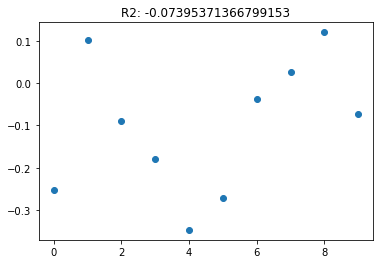

In [49]:
from sklearn.metrics import r2_score
plt.scatter(random_state_variable_list, r2_list)
plt.title('R2: ' + str(r2_score(y_test, y_pred)))

Mean Absolute Error: 0.8477702809523803
Mean Squared Error: 0.9968413525343721
Root Mean Squared Error: 0.9984194271619379
XXXXXXXXXXXXXXXXXXXXX


Text(0.5, 1.0, 'R2: 0.20696791592352937\nRandom_seed: 0\n test_set=28')

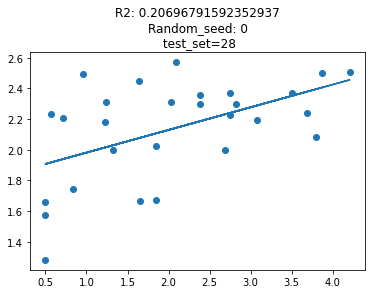

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('XXXXXXXXXXXXXXXXXXXXX')
plt.scatter(y_test, y_pred)
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b)
# plt.title('R2: ' + str(r2_score(y_test, y_pred)) + '/ntest_set='+str(y_test.shape[0]))

plt.title('R2: ' + str(r2_score(y_test, y_pred)) +"" + "\nRandom_seed: " +
              str(random_state_variable) +
             '\n test_set='+str(y_test.shape[0]))

# Validation datasets

In [70]:
X_valid = allMerged.iloc[:, 2:,].values #descreptors
y_valid = allMerged.iloc[:, 1].values #desirable data

# allMerged_excluded.dropna(inplace=True)
# X_valid = allMerged_excluded.iloc[:, 2:,].values #descreptors
# y_valid = allMerged_excluded.iloc[:, 1].values #desirable data

X_valid.shape
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_valid_norm = sc.fit_transform(X_valid)
X_valid_norm.shape
# allMerged_excluded.dropna(inplace=True)
# allMerged_excluded

(314, 163)

Mean Absolute Error: 3.656641628609334
Mean Squared Error: 28.714896230173828
Root Mean Squared Error: 5.358628204137121
XXXXXXXXXXXXXXXXXXXXX


Text(0.5, 1.0, 'R2: R2: 0.8420577337971834')

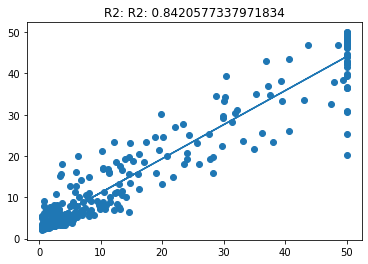

In [74]:
Y_valid_pred = regressor.predict(X_valid_norm)
# print(X_valid_norm)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, Y_valid_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, Y_valid_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, Y_valid_pred)))
print('XXXXXXXXXXXXXXXXXXXXX')
plt.scatter(y_valid, Y_valid_pred)
m, b = np.polyfit(y_valid, Y_valid_pred, 1)
plt.plot(y_valid, m*y_valid + b)
# plt.title('R2: ' + str(r2_score(y_valid, Y_valid_pred)))
plt.title('R2: ' + str('R2: 0.8420577337971834'))

In [96]:
for f in allMerged.columns[2:]:
    print (f)

logS_SD
logS_7_4
logP_SD
logD_SD
2C9_pKi
hERG
BBB_log_SD
BBB
Pgp
2D6
PPB
MW_VS
HBD
HBA
TPSA_SD
Flexibility_SD
AromRings
V_VS
S_VS
R_VS
G_VS
W1_VS
W2_VS
W3_VS
W4_VS
W5_VS
W6_VS
W7_VS
W8_VS
D1_VS
D2_VS
D3_VS
D4_VS
D5_VS
D6_VS
D7_VS
D8_VS
WO1_VS
WO2_VS
WO3_VS
WO4_VS
WO5_VS
WO6_VS
WN1_VS
WN2_VS
WN3_VS
WN4_VS
WN5_VS
WN6_VS
IW1_VS
IW2_VS
IW3_VS
IW4_VS
CW1_VS
CW2_VS
CW3_VS
CW4_VS
CW5_VS
CW6_VS
CW7_VS
CW8_VS
ID1_VS
ID2_VS
ID3_VS
ID4_VS
CD1_VS
CD2_VS
CD3_VS
CD4_VS
CD5_VS
CD6_VS
CD7_VS
CD8_VS
HL1_VS
HL2_VS
A_VS
CP_VS
POL_VS
FLEX_VS
FLEX_RB_VS
NCC_VS
DIFF_VS
LOGP_nOct_VS
LOGP_cHex_VS
PSA_VS
HAS_VS
PSAR_VS
PHSAR_VS
LgD5_VS
LgD6_VS
LgD7_VS
LgD7_5_VS
LgD8_VS
LgD9_VS
LgD10_VS
AUS7_4_VS
FU4_VS
FU5_VS
FU6_VS
FU7_VS
FU8_VS
FU9_VS
FU10_VS
DRDRDR_VS
DRDRAC_VS
DRDRDO_VS
DRACAC_VS
DRACDO_VS
DRDODO_VS
ACACAC_VS
ACACDO_VS
ACDODO_VS
DODODO_VS
SOLY_VS
LgS3_VS
LgS4_VS
LgS5_VS
LgS6_VS
LgS7_VS
LgS7_5_VS
LgS8_VS
LgS9_VS
LgS10_VS
LgS11_VS
PB_VS
VD_VS
CACO2_VS
SKIN_VS
LgBB_VS
MetStab_VS
L0LgS_VS
L1LgS_VS
L2LgS_VS
L3L

# Visualising leaves

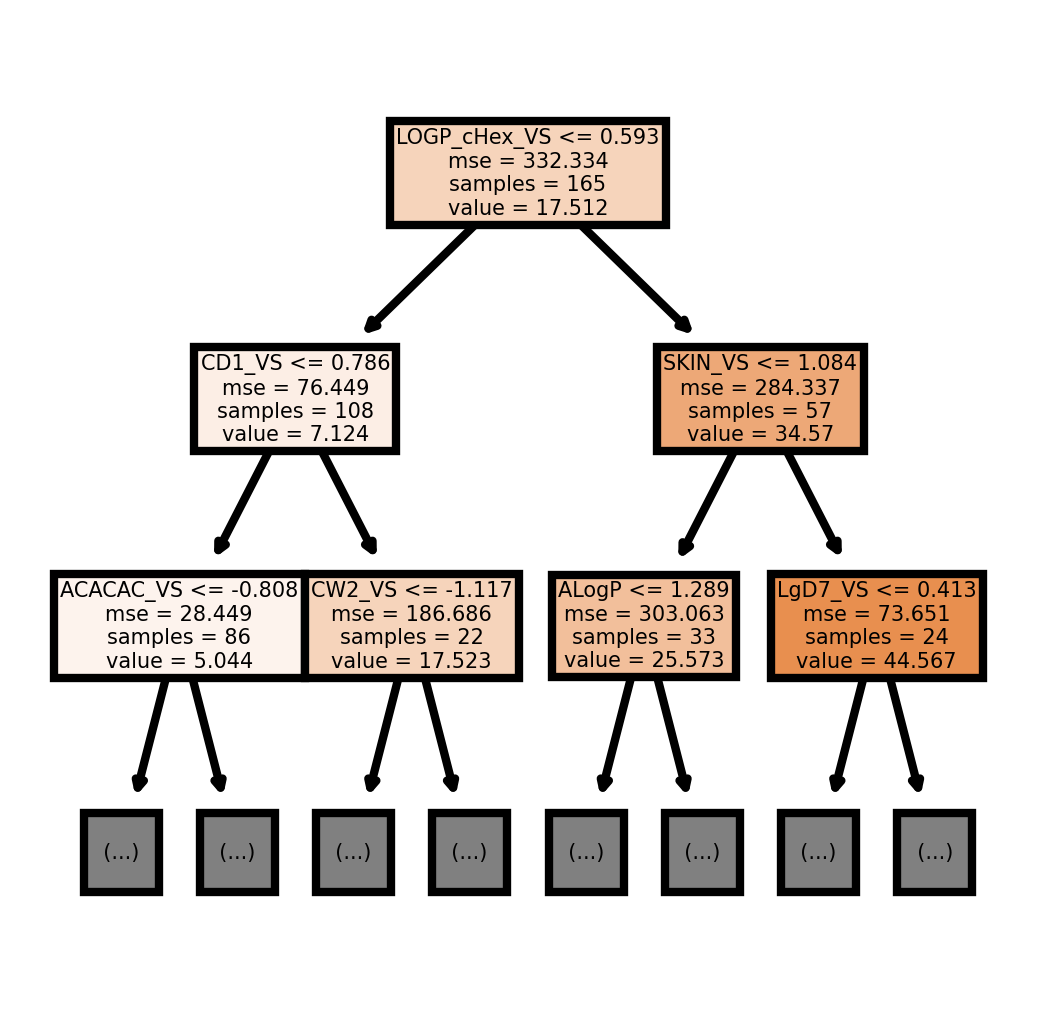

In [108]:
estimator = regressor.estimators_[2]
# print(estimator)
allMerged.columns[2:]
allMerged.columns[1]

fn=allMerged.columns[2:]
cn=allMerged.columns[1]
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
tree.plot_tree(estimator,
               feature_names = fn, 
               class_names=cn,
               filled = True,
               max_depth=2,
               fontsize = 2.5);
fig.savefig('rf_individualtree.png')